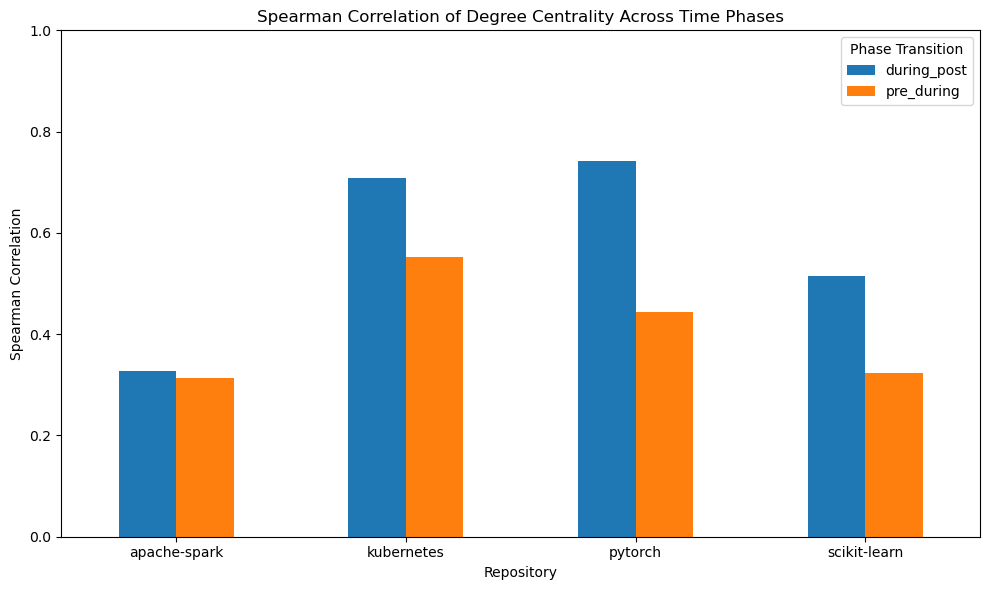

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
spearman_df = pd.read_csv("../data/results/spearman_centrality.csv")
global_metrics_df = pd.read_csv("../data/results/global_metrics.csv")
# Filter for Degree centrality
degree_df = spearman_df[spearman_df["metric"] == "degree"]

# Pivot for plotting
pivot_degree = degree_df.pivot(index="repo", columns="phase_pair", values="spearman_corr")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_degree.plot(kind="bar", ax=ax)

ax.set_title("Spearman Correlation of Degree Centrality Across Time Phases")
ax.set_ylabel("Spearman Correlation")
ax.set_xlabel("Repository")
ax.set_ylim(0, 1)
ax.legend(title="Phase Transition")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



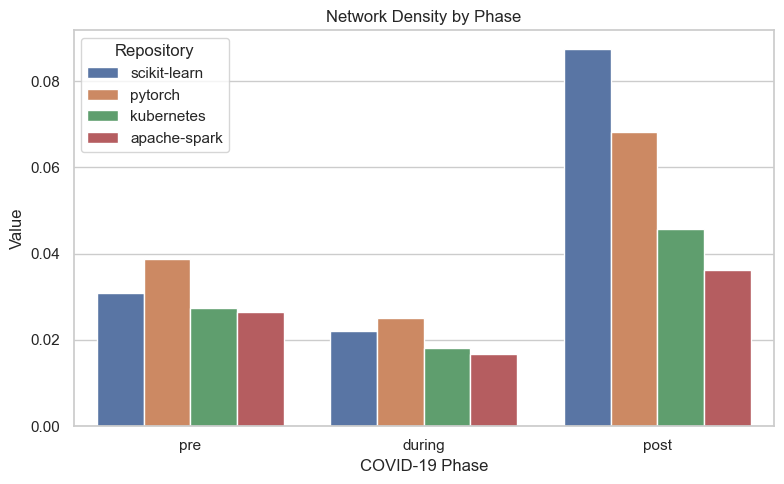

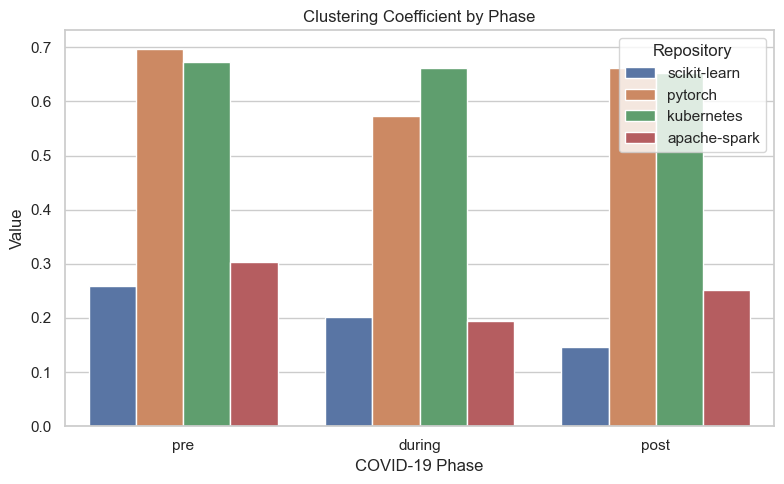

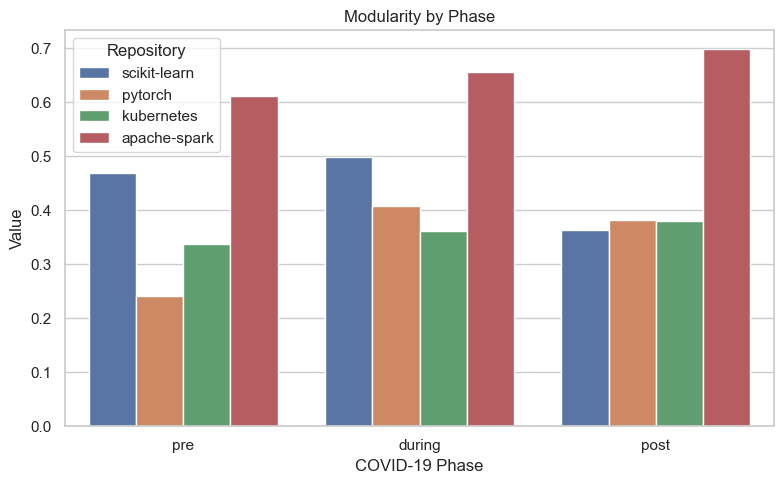

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set(style="whitegrid")

# Define metrics and titles
metrics = ['density', 'avg_clustering', 'modularity']
titles = ['Network Density by Phase', 'Clustering Coefficient by Phase', 'Modularity by Phase']
filenames = ['density_plot.png', 'clustering_plot.png', 'modularity_plot.png']

# Plot each metric individually
for metric, title, filename in zip(metrics, titles, filenames):
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=global_metrics_df,
        x='phase',
        y=metric,
        hue='repo'
    )
    plt.title(title)
    plt.xlabel('COVID-19 Phase')
    plt.ylabel('Value')
    plt.legend(title='Repository')
    plt.tight_layout()
    plt.savefig(f'../figures/results/{filename}', dpi=300)
    plt.show()


c:\Users\20225118\AppData\Local\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\20225118\AppData\Local\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


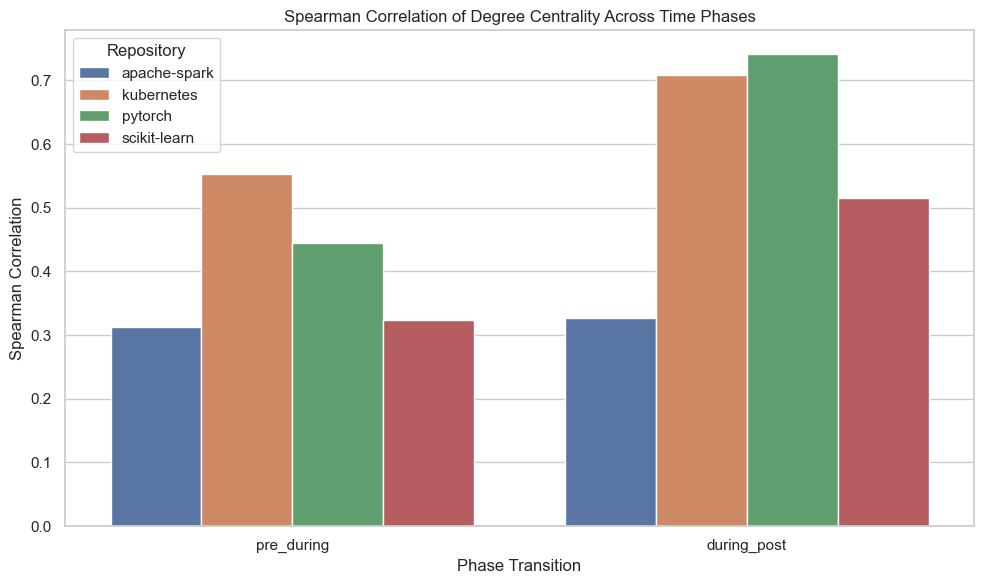

c:\Users\20225118\AppData\Local\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\20225118\AppData\Local\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


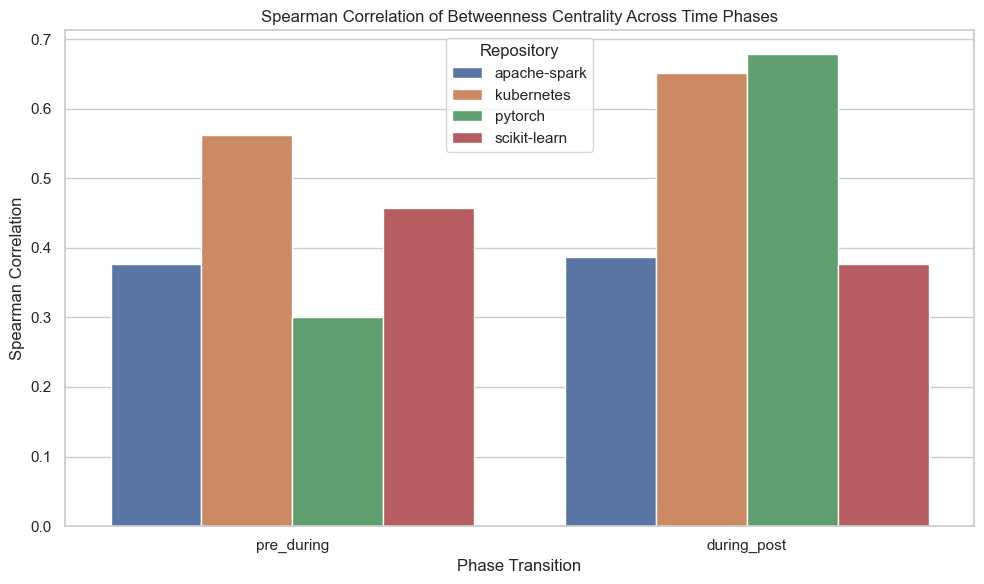

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct order of phases
phase_order = ['pre_during', 'during_post']

# Pivot the data
pivot_df = spearman_df.pivot_table(
    index=["repo", "phase_pair"],
    columns="metric",
    values="spearman_corr"
).reset_index()

# Sort for visual clarity
pivot_df['phase_pair'] = pd.Categorical(pivot_df['phase_pair'], categories=phase_order, ordered=True)
pivot_df = pivot_df.sort_values('phase_pair')

# Plot 1: Degree Centrality
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_df, x='phase_pair', y='degree', hue='repo')
plt.title("Spearman Correlation of Degree Centrality Across Time Phases")
plt.xlabel("Phase Transition")
plt.ylabel("Spearman Correlation")
plt.legend(title="Repository")
plt.tight_layout()
plt.savefig("../figures/results/spearman_degree.png", dpi=300)
plt.show()

# Plot 2: Betweenness Centrality
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_df, x='phase_pair', y='betweenness', hue='repo')
plt.title("Spearman Correlation of Betweenness Centrality Across Time Phases")
plt.xlabel("Phase Transition")
plt.ylabel("Spearman Correlation")
plt.legend(title="Repository")
plt.tight_layout()
plt.savefig("../figures/results/spearman_betweenness.png", dpi=300)
plt.show()
